# **CIFAR10**

In [52]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [53]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

In [54]:
xtr.shape

(50000, 32, 32, 3)

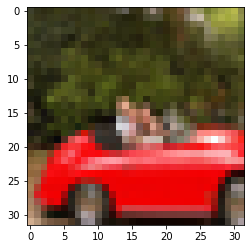

In [55]:
plt.imshow(xtr[99], cmap='gray')

In [56]:
ytr[99]

array([1], dtype=uint8)

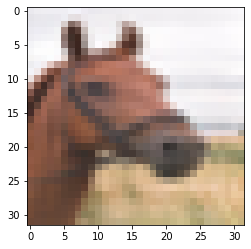

In [57]:
plt.imshow(xte[99], cmap='gray')

In [58]:
yte[99]

array([7], dtype=uint8)

In [59]:
ytr=tcg(ytr)
yte=tcg(yte)

In [60]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [61]:
model = Sequential([
  Flatten(input_shape=(32, 32, 3)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [62]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [63]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=13, batch_size=64)

Epoch 1/13
782/782 [==============================] - 4s 5ms/step - loss: 1.8678 - accuracy: 0.3227 - val_loss: 1.7552 - val_accuracy: 0.3585
Epoch 2/13
782/782 [==============================] - 4s 5ms/step - loss: 1.6903 - accuracy: 0.3928 - val_loss: 1.7458 - val_accuracy: 0.3701
Epoch 3/13
782/782 [==============================] - 4s 5ms/step - loss: 1.6164 - accuracy: 0.4219 - val_loss: 1.5798 - val_accuracy: 0.4356
Epoch 4/13
782/782 [==============================] - 4s 5ms/step - loss: 1.5526 - accuracy: 0.4448 - val_loss: 1.5403 - val_accuracy: 0.4479
Epoch 5/13
782/782 [==============================] - 4s 5ms/step - loss: 1.5155 - accuracy: 0.4580 - val_loss: 1.5063 - val_accuracy: 0.4650
Epoch 6/13
782/782 [==============================] - 4s 5ms/step - loss: 1.4697 - accuracy: 0.4745 - val_loss: 1.4876 - val_accuracy: 0.4732
Epoch 7/13
782/782 [==============================] - 4s 5ms/step - loss: 1.4481 - accuracy: 0.4844 - val_loss: 1.4468 - val_accuracy: 0.4884
Epoch 

In [64]:
model.evaluate(xtr,ytr)

1563/1563 [==============================] - 5s 3ms/step - loss: 1.2772 - accuracy: 0.5397


[1.2771670818328857, 0.5397199988365173]

In [65]:
score = model.evaluate(xte,yte)

313/313 [==============================] - 1s 3ms/step - loss: 1.4161 - accuracy: 0.4977


In [66]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4161287546157837
Test accuracy: 0.4977000057697296


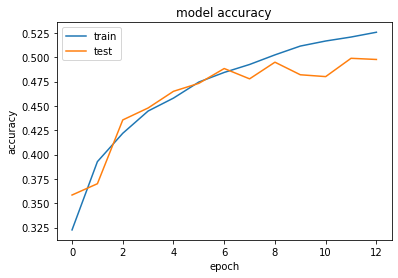

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

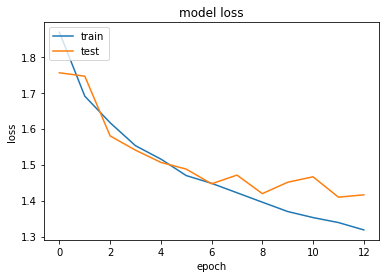

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()